In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import scipy as sp
import scipy.integrate as integrate
import scipy.constants as constants
from scipy.integrate import odeint
from scipy import linalg
import sympy as sym
from scipy.optimize import fmin
import time
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 6.0)
plt.rcParams['font.size'] = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for i in range(6):
    print("Starte mit Aufgabe %i nach spätestens %i Minuten!"% (i+1, 120/6*i))

Starte mit Aufgabe 1 nach spätestens 0 Minuten!
Starte mit Aufgabe 2 nach spätestens 20 Minuten!
Starte mit Aufgabe 3 nach spätestens 40 Minuten!
Starte mit Aufgabe 4 nach spätestens 60 Minuten!
Starte mit Aufgabe 5 nach spätestens 80 Minuten!
Starte mit Aufgabe 6 nach spätestens 100 Minuten!


## Aufgabe 1:

In [3]:
diff = lambda fun, x,  h: (fun(x + h) - 2 * f(x) + f(x - h)) / h**2

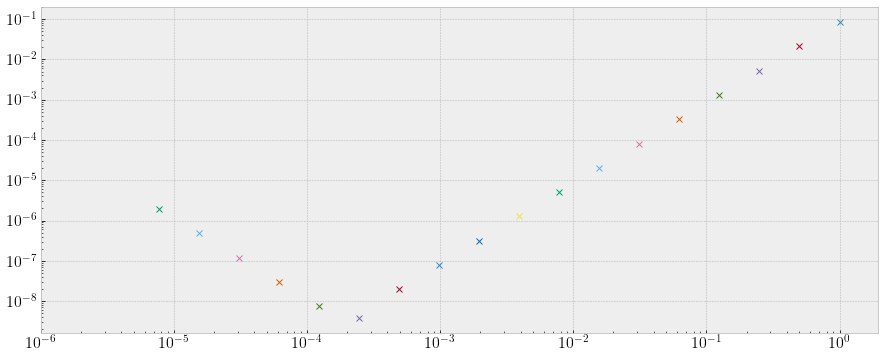

0.000244140625

In [4]:
f = lambda x: np.exp(x)
df= lambda x: np.exp(x)

x = 0
for i in range(20):
    h = 1/2**i
    plt.plot(h, abs(df(x) - diff(f, x, h)), "x")
plt.loglog()
plt.show()
1/2**12

Am nähesten kommen wir dem algebraischen Wert bei h = 0.000244140625
gleich 12 mal halbiert

## Aufgabe 2:

In [5]:
S_n_max = lambda n_max: np.sum([1 / ((n + 1) * ((n + 1 ) + 1) * ((n + 1) + 2)) for n in range(n_max)])

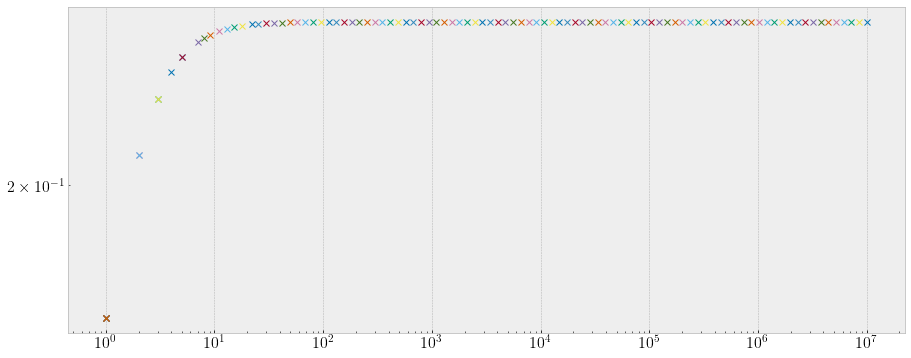

In [6]:
n_max_liste = np.logspace(0, 7, 100)
for n_max in n_max_liste:
    n_max = int(n_max)
    plt.plot(n_max, S_n_max(n_max), "x")
#plt.semilogy()
plt.loglog()
plt.show()

Der Wert der Summe ist 1/4. 

In [7]:
np.sum([(n + 1) * ((n + 1 ) + 1) * ((n + 1) + 2) for n in range(n_max)])

2500001500000275000015000000

## Aufgabe 3:

In [8]:
V = lambda x: -np.exp(-x**2) + (1 - np.exp(-3 * x**2)) / x

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Optimization terminated successfully.
         Current function value: -0.586888
         Iterations: 25
         Function evaluations: 50


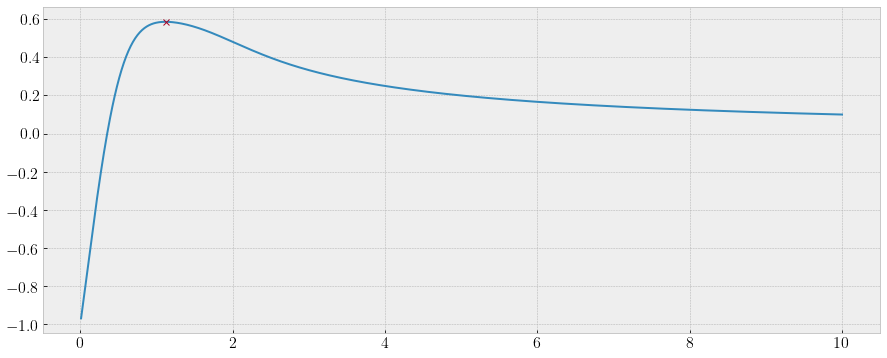

Das Maximum von 0.586888 von der Funktion liegt bei 1.119063


In [9]:
x = np.linspace(0,10,1000)
x_V_max = fmin(lambda x: -V(x), 0)[0]
V_max = V(x_V_max)
plt.plot(x, V(x))
plt.plot(x_V_max, V_max, "x")
plt.show()
print("Das Maximum von %f von der Funktion liegt bei %f" %(V_max, x_V_max))

## Aufgabe 4:

In [10]:
Körper = lambda x: np.cos(x)/(1 + x)
I = lambda f, a, b: np.pi / 2 * integrate.quad(lambda x: f(x)**4, a, b)[0]
I(Körper,0, np.pi/2)

0.3662218923569701

## Aufgabe 5:

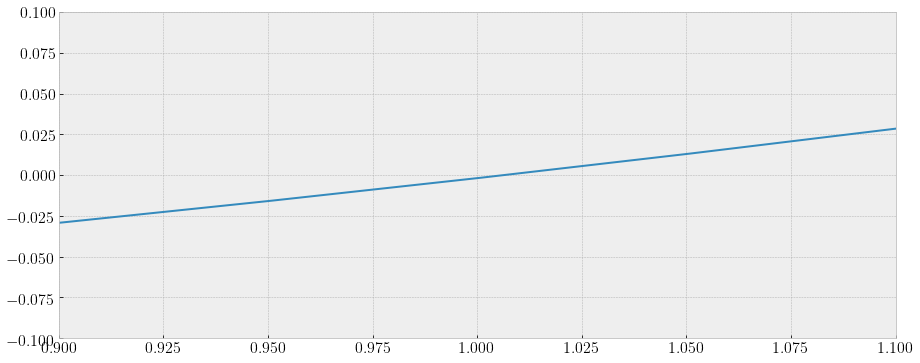

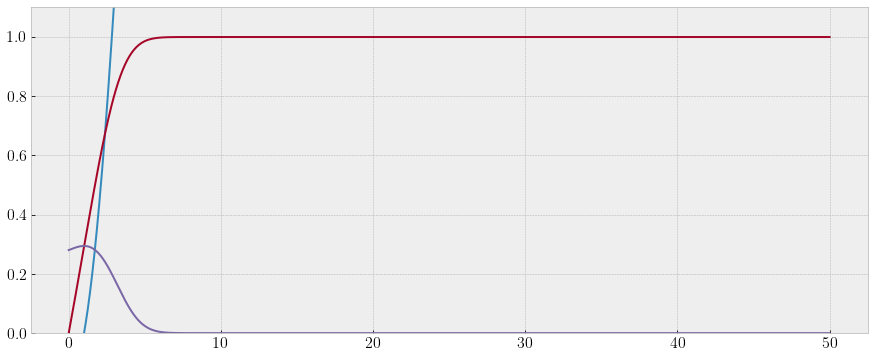

In [11]:
def fun(y, t):
    f0, f1, f2 = y
    df = [f1, f2, -0.5 * f0 * f2]
    return df
x = np.linspace(0,50,1000)
y_0 = [-.145,0,.28]
l = odeint(fun, y_0, x)

plt.plot(x, l)
plt.xlim(0.9,1.1), plt.ylim(-0.1,0.1)
plt.show()
plt.plot(x, l)
plt.ylim(0,1.1)
plt.show()

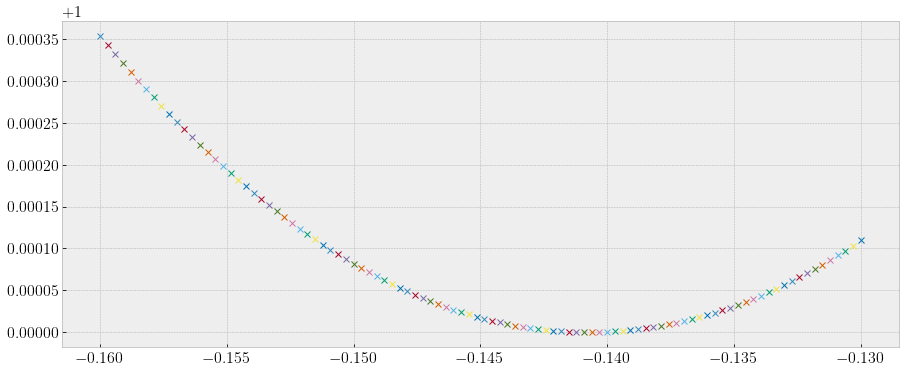

In [12]:
def fun(y, t):
    f0, f1, f2 = y
    df = [f1, f2, -0.5 * f0 * f2]
    return df

def dgl(y_0_1, y_0_3):
    y_0_2 = 0
    y_0 = [y_0_1, y_0_2, y_0_3]
    l = odeint(fun, y_0, x)
    
    # return abs(l[xg0, 0]) + abs(1 - l[-1,-1])
    return (l[xg0, 0])**2 + (1 - l[-1,-1])**2

x = np.linspace(0,10,100)
xg0 = (abs(x-1)).argmin()
y_0_1 = -.145
y_0_3 = .27

#fmin(dgl, np.array([y_0_1, y_0_3]), args=(y_0_3,))
#dgl(y_0)
y = np.linspace(-0.16, -0.13, 100)
for y_ in y:
    plt.plot(y_, dgl(y_, y_0_3), "x")

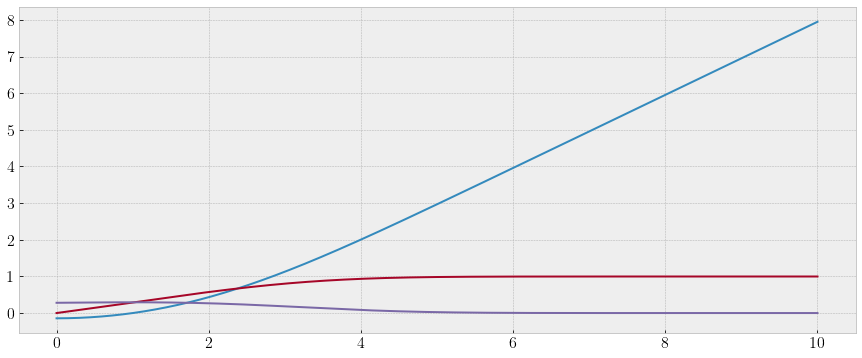

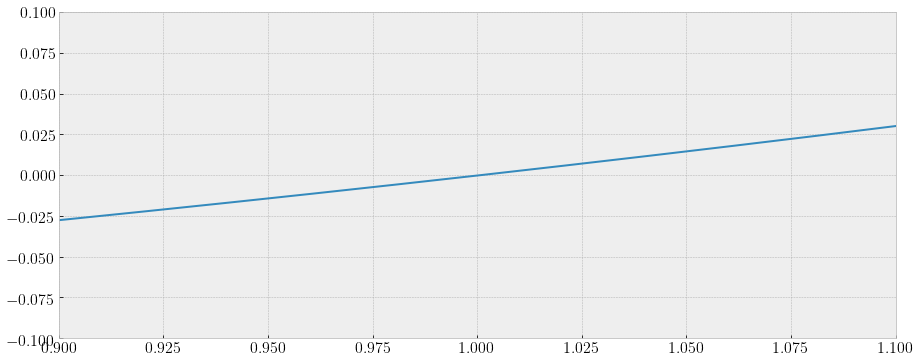

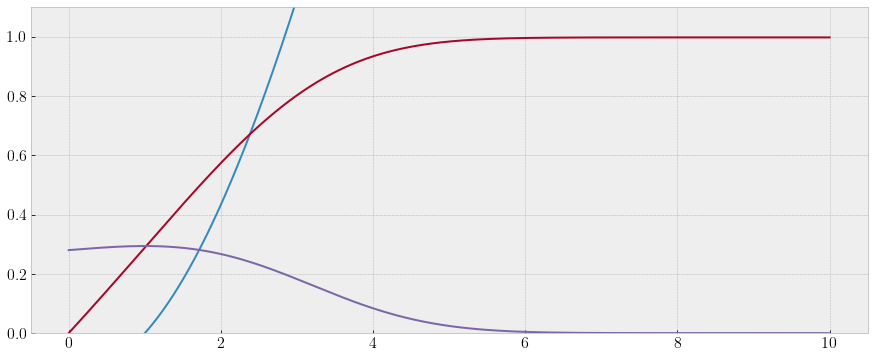

In [14]:
def fmin_2d(fun, x1, x2, n_max, plotten):
    x1_x2_liste = np.zeros([n_max + 1,2])
    x1_x2_liste[0]= ([x1,x2])
    
    for n in range(n_max):
        x1 = fmin(lambda x1: fun(x1, x2), x1, disp=0)[0]
        x2 = fmin(lambda x2: fun(x1, x2), x2, disp=0)[0]
        x1_x2_liste[n+1]= ([x1,x2])
    
    if plotten:
        fig, ax1 = plt.subplots()
        ax1.plot(x1_x2_liste[:,0], "x", c="C0")
        ax1.set_xlabel('Schritte')
        ax1.set_ylabel('Parameter 1', color="C0")
        ax1.tick_params('y', colors="C0")
        ax2 = ax1.twinx()
        ax2.plot(x1_x2_liste[:,1], "x", c="C1")
        ax2.set_ylabel('Parameter 2', color="C1")
        ax2.tick_params('y', colors="C1")
        fig.tight_layout()
        plt.show()

    return x1, x2
#print(ys[:-1])
x = np.linspace(0,10,1000)
xg0 = (abs(x-1)).argmin()
ys = fmin_2d(dgl, -.145, .28,20,0)
y_0 = [ys[0], 0, ys[1]]

l = odeint(fun, y_0, x)

plt.plot(x, l)
plt.show()
plt.plot(x, l)
plt.xlim(0.9,1.1), plt.ylim(-0.1,0.1)
plt.show()
plt.plot(x, l)
plt.ylim(0,1.1)
plt.show()

In [15]:
[ys[0], ys[1]]

[-0.14335742187499995, 0.28]

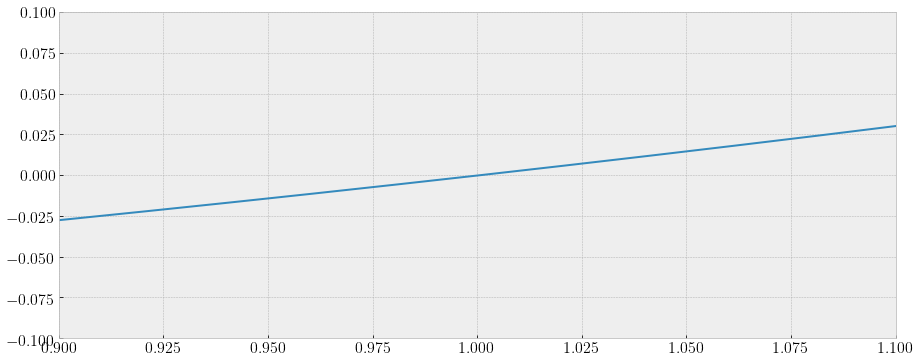

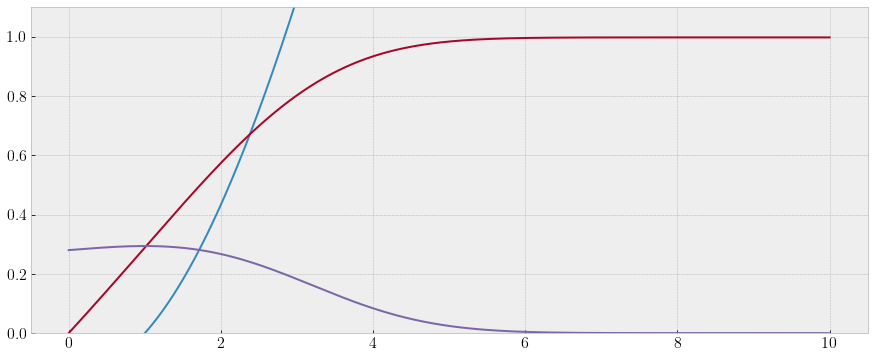

In [16]:
plt.plot(x, l)
plt.xlim(0.9,1.1), plt.ylim(-0.1,0.1)
plt.show()
plt.plot(x, l)
plt.ylim(0,1.1)
plt.show()

## Aufgabe 6:


In [19]:
def dif2_matrix(x,dx):
    dif_now = np.diag(np.ones(len(x))) * -2
    dif_pre_ones = np.ones(len(x)-1)
    dif_pre = np.diag(dif_pre_ones, k=-1)
    dif_post_ones = np.ones(len(x)-1)
    dif_post = np.diag(dif_post_ones, k=1)     
    dif  =  dif_now + dif_pre + dif_post
    dif /= dx**2
    return dif

x = np.linspace(1,10, 1000)
dx = x[1] - x[0]
d2_m = dif2_matrix(x, dx)

def potential(x):
    V_matrix = np.eye(len(x))
    for i in range(len(x)):
        V_matrix[i,i] *=  V(x[i])
    return V_matrix

V = lambda x: -2 * np.exp(x**2)
#V = lambda x: -5 / np.cosh(x)

H = -0.5*dif2_matrix(x, dx) + potential(x)
#H = -dif2_matrix(x, dx) + potential(x)
ew, ev = linalg.eigh(H)


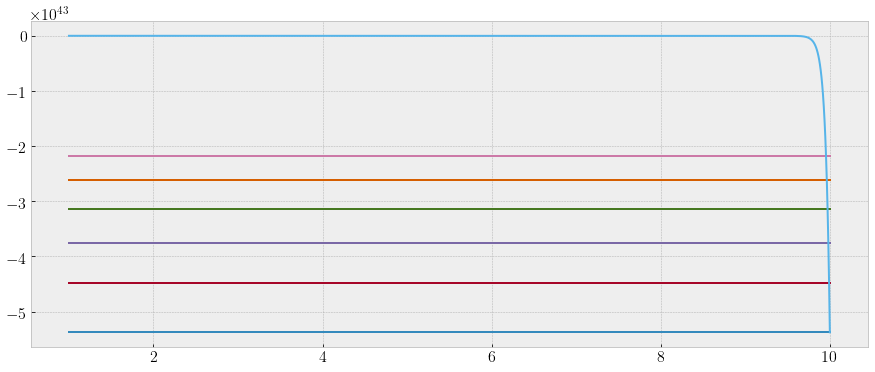

In [20]:
#plt.plot(x, V(x))
Nev = 6
for i in range(Nev):
    plt.plot(x,ev[:,i]+ew[i])    
plt.plot(x, V(x))

In [ ]:
ew

In [ ]:
ev

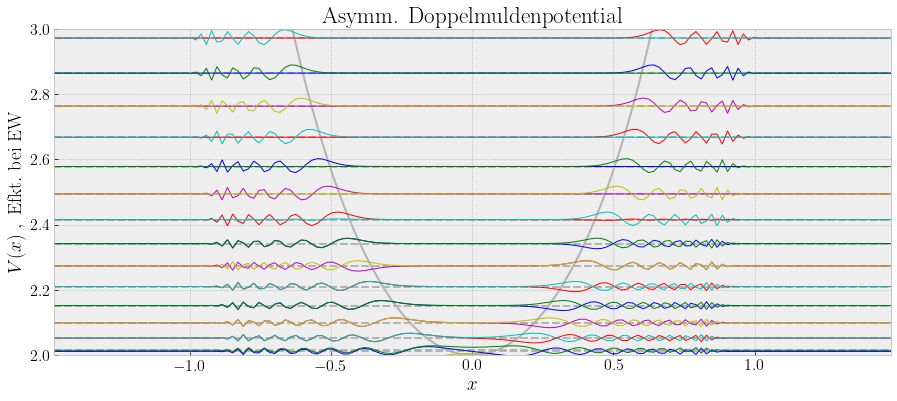

In [33]:
import numpy as np
from scipy.linalg import eigh
from matplotlib import pyplot as plt


def diskretisierung(xmin, xmax, N):
    """Berechne die quantenmechanisch korrekte Ortsdiskretisierung.

    Parameter:
        xmin: unteres Ende des Bereiches
        xmax: oberes Ende des Bereiches
        N: Anzahl der Diskretisierungspunkte
    Rueckgabe:
        x: Array mit diskretisierten Ortspunkten
    """
    delta_x = (xmax - xmin)/(N + 1.0)                      # Ortsgitterabstand
    x = np.linspace(xmin + delta_x, xmax - delta_x, N)     # Ortsgitterpunkte
    return x


def diagonalisierung(hquer, x, V):
    """Berechne sortierte Eigenwerte und zugehoerige Eigenfunktionen.

    Parameter:
        hquer: effektives hquer
        x: Ortspunkte
        V: Potentialwerte an x
    Rueckgabe:
        ew: sortierte Eigenwerte (Array der Laenge N)
        ef: entsprechende Eigenvektoren, ef[:, i] (Groesse N*N)
    """
    delta_x = x[1] - x[0]
    N = len(x)
    #z = hquer**2/(2.0*delta_x**2)                          # Nebendiagonalelem.
    z = -1                          # Nebendiagonalelem.
    h = (np.diag(V - 1) +
         np.diag(np.ones(N - 1)/2, -1) +                  # Matrix-Darstellung
         np.diag(np.ones(N - 1)/2, 1))                    # Hamilton-Operat.

    ew, ef = eigh(h)                                       # Diagonalisierung
    ef = ef/np.sqrt(delta_x)                               # WS-Normierung
    return ew, ef


def plot_eigenfunktionen(ax, ew, ef, x, V, width=1, Emax=10, fak=0.01,
                         betragsquadrat=False, basislinie=True, alpha=1,
                         title=None):
    """Darstellung der Eigenfunktionen.

    Dargestellt werden die niedrigsten Eigenfunktionen 'ef' im Potential 'V(x)'
    auf Hoehe der Eigenwerte 'ew' in den Plotbereich 'ax'.

    Optionale Parameter:
        width: (mit Default-Wert 1) gibt die Linienstaerke beim Plot der
            Eigenfunktionen an. width kann auch ein Array von Linienstaerken
            sein mit einem spezifischen Wert fuer jede Eigenfunktion.
        Emax: (mit Default-Wert 1/10) legt die Energieobergrenze
            fuer den Plot fest.
        fak: ist ein Skalierungsfaktor fuer die graphische Darstellung
            der Eigenfunktionen.
        betragsquadrat: gibt an, ob das Betragsquadrat der Eigenfunktion oder
            die (reelle!) Eigenfunktion selbst dargestellt wird.
        basislinie: gibt an, ob auf Hoehe der jeweiligen Eigenenergie eine
            gestrichelte graue Linie gezeichnet wird.
        alpha: gibt die Transparenz beim Plot der Eigenfunktionen an (siehe
            auch Matplotlib Dokumentation von plot()). alpha kann auch ein
            Array von Transparenzwerten sein mit einem spezifischen Wert
            fuer jede Eigenfunktion.
        title: Titel fuer den Plot.
    """
    if title is None:
        title = "Asymm. Doppelmuldenpotential"

    plt.axes(ax)                                      # Ortsraumplotfenster
    plt.setp(ax, autoscale_on=False)
    plt.axis([np.min(x), np.max(x), np.min(V), Emax])
    plt.xlabel(r'$x$')
    plt.title(title)

    plt.plot(x, V, linewidth=2, color='0.7')          # Potential plotten
    anz = np.sum(ew <= Emax)                          # Zahl zu plottenden Ef

    if basislinie:                                    # Plot Basislinie bei Ew
        for i in np.arange(anz):
            plt.plot(x, ew[i] + np.zeros(len(x)), ls='--', color='0.7')

    try:                                              # Verhaelt sich width
        iter(width)                                   # wie ein array?
    except TypeError:                                 # Falls `width` skalar:
        width = width * np.ones(anz)                  # konst. Linienstaerke

    try:                                              # entsprechend fuer
        iter(alpha)                                   # Transparenz alpha
    except TypeError:
        alpha = alpha * np.ones(anz)

    colors = ['b', 'g', 'r', 'c', 'm', 'y']           # feste Farbreihenfolge
    if betragsquadrat:                                # Plot Betragsquadr. Efkt
        plt.ylabel(r'$V(x)\ \rm{,\ \|Efkt.\|^{2}\ bei\ EW}$')
        for i in np.arange(anz):
            plt.plot(x, ew[i] + fak*np.abs(ef[:, i])**2, linewidth=width[i],
                     color=colors[i % len(colors)], alpha=alpha[i])
    else:                                             # Plot Efkt
        plt.ylabel(r'$V(x)\ \rm{,\ Efkt.\ bei\ EW}$')
        for i in np.arange(anz):
            plt.plot(x, ew[i] + fak*ef[:, i], linewidth=width[i],
                     color=colors[i % len(colors)], alpha=alpha[i])


def potential(x, A):
    """Potentialfunktion fuer die asymmetrische Doppelmulde mit Parameter A."""
    return 2 * np.exp(x**2)


asym = 0.04                              # Potentialparameter
L = 1.5                                  # x-Bereich ist [-L,L]
N = 160                                  # Zahl der Gitterpunkte
hquer = 0.05                             # effektives hquer


x_disk = diskretisierung(-L, L, N)    # Ortsdiskretisierung
V = potential(x_disk, asym)              # Potential

# Eigenfunktionen berechnen
ew, ef = diagonalisierung(hquer, x_disk, V)

# Eigenfunktionen plotten
ax = plt.subplot(111)
plot_eigenfunktionen(ax, ew, ef, x_disk, V, Emax=3)

plt.show()


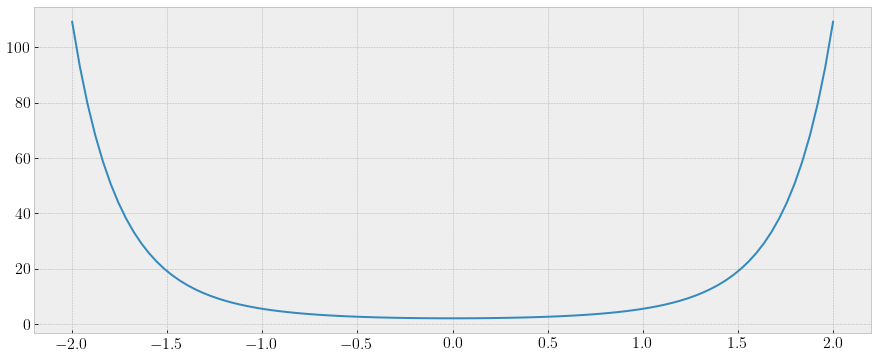

In [31]:
x = np.linspace(-2,2, 100)
plt.plot(x, 2 * np.exp(x**2))